Promedio de bateos y jonrones en el béisbol: 

¿Hay una correlación lineal entre el promedio de bateo y el porcentaje de jonrones?

Una muestra aleatoria de 7 jugadores nos proporciona cierta información


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#X es porcentaje de bateo 
#y son los jonrones

x = np.array([0.243, 0.259, 0.286, 0.263, 0.268, 0.339, 0.299])
y = np.array([1.4,3.6,5.5,3.8,3.5,7.3,5.0])

df = pd.DataFrame({'x': x, 'y': y})

In [7]:
df.corr()

,x,y
x,1.000000,0.948073
y,0.948073,1.000000


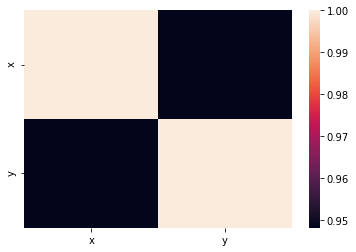

In [10]:
sns.heatmap(df.corr())

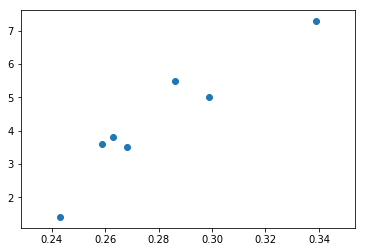

In [11]:
plt.scatter(x = 'x', y = 'y', data = df)

Tienen una correlación fuerte de forma positiva. 
A mayor porcentaje de bateo, mayor es la posibilidad de jonrones

In [12]:
#Regresión lineal 

y = a + b*x

In [16]:
suma_x = sum(df['x']) #suma de x
suma_y = sum(df['y']) #suma de y
x2 = sum(df['x']**2) #x al cuadrado
y2 = sum(df['y']**2) #y al cuadrado
xy = sum(df['x']*df['y']) #suma de x*y
media_x = np.mean(df['x']) #promedio de x
media_y = np.mean(df['y']) #promedio de y

In [17]:
suma_x, suma_y, x2, y2, xy, media_x, media_y

(1.957, 30.1, 0.553241, 150.15, 8.752699999999999, 0.2795714285714286, 4.3)

In [18]:
#Calculando nuestra pendiente en la formula y = a + b.x

n1 = len(df)*xy-(suma_x*suma_y)
n2 = len(df)*x2-(suma_x**2)

b = n1/n2

In [19]:
print("El valor de la pendiente es: ",b)

El valor de la pendiente es:  55.16597413511387


In [20]:
a = media_y - (b*media_x)

In [21]:
print("El valor del intercepto es: ",a)

El valor del intercepto es:  -11.122830197488263


In [22]:
y = a + b*0.5

In [23]:
print(y)

16.460156870068673


In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])

In [28]:
#89% de certeza que confirma de que estos valores dependen entre sí

r_value**2

0.8988432851358288

In [29]:
#Este p_value confirma la relación

p_value

0.0011474609986362099

In [31]:
#Tenemos un error estadístico del 8%, relativamente bajo

std_err

8.276403554712319

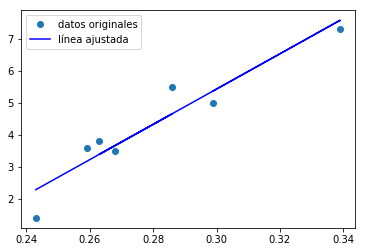

In [32]:
plt.plot(df['x'], df['y'], 'o', label='datos originales')
plt.plot(df['x'], a + b*df['x'], 'b', label='línea ajustada')
plt.legend()
plt.show()